**Exploratory Data Analysis**

In [168]:
#library/function file
import pandas as pd
import numpy as np
import glob
cleanfiles=glob.glob('cleandata/cleandata*.csv') #use glob to make list of file names
cleandata=[]
for filename in cleanfiles:
    cleandata.append(pd.read_csv(filename))
print(cleandata[0].head())

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.185702      0.000051   20.27926   0.033027   0.404524  19.03009   
1  GALAXY  0.353038      0.000067   20.41617   0.051364   0.068213  18.74046   
2  GALAXY  0.527042      0.000099   22.38628   0.191882   0.094343  20.59653   
3  GALAXY  0.397942      0.000153   20.55792   0.069158   0.284085  18.78533   
4  GALAXY  0.613297      0.000307   21.39559   0.219298   0.173314  19.90453   

    red_err   red_ext  
0  0.017111  0.279848  
1  0.017799  0.047189  
2  0.058532  0.065266  
3  0.023086  0.196528  
4  0.089911  0.119898  


In [163]:
cleanfiles

['cleandata\\cleandata14k_1.csv',
 'cleandata\\cleandata14k_10.csv',
 'cleandata\\cleandata14k_2.csv',
 'cleandata\\cleandata14k_3.csv',
 'cleandata\\cleandata14k_4.csv',
 'cleandata\\cleandata14k_5.csv',
 'cleandata\\cleandata14k_6.csv',
 'cleandata\\cleandata14k_7.csv',
 'cleandata\\cleandata14k_8.csv',
 'cleandata\\cleandata14k_9.csv',
 'cleandata\\cleandata20k_1.csv',
 'cleandata\\cleandata20k_10.csv',
 'cleandata\\cleandata20k_2.csv',
 'cleandata\\cleandata20k_3.csv',
 'cleandata\\cleandata20k_4.csv',
 'cleandata\\cleandata20k_5.csv',
 'cleandata\\cleandata20k_6.csv',
 'cleandata\\cleandata20k_7.csv',
 'cleandata\\cleandata20k_8.csv',
 'cleandata\\cleandata20k_9.csv',
 'cleandata\\cleandata28k_1.csv',
 'cleandata\\cleandata28k_10.csv',
 'cleandata\\cleandata28k_2.csv',
 'cleandata\\cleandata28k_3.csv',
 'cleandata\\cleandata28k_4.csv',
 'cleandata\\cleandata28k_5.csv',
 'cleandata\\cleandata28k_6.csv',
 'cleandata\\cleandata28k_7.csv',
 'cleandata\\cleandata28k_8.csv',
 'cleandata

In [2]:
# double check data types
print(cleandata[-1].info())
print(cleandata[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 9 columns):
class           7125 non-null object
redshift        7125 non-null float64
redshift_err    7125 non-null float64
green_mag       7125 non-null float64
green_err       7125 non-null float64
green_ext       7125 non-null float64
red_mag         7125 non-null float64
red_err         7125 non-null float64
red_ext         7125 non-null float64
dtypes: float64(8), object(1)
memory usage: 501.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14089 entries, 0 to 14088
Data columns (total 9 columns):
class           14089 non-null object
redshift        14089 non-null float64
redshift_err    14089 non-null float64
green_mag       14089 non-null float64
green_err       14089 non-null float64
green_ext       14089 non-null float64
red_mag         14089 non-null float64
red_err         14089 non-null float64
red_ext         14089 non-null float64
dtypes: float64(8), object(1)
memory

In [192]:
#lets do some basic analysis on each sample size
print(cleandata[0].describe())
print(cleandata[6].describe())
print(cleandata[12].describe())
print(cleandata[35].describe())

           redshift  redshift_err     green_mag     green_err     green_ext  \
count  14089.000000  14089.000000  14089.000000  14089.000000  14089.000000   
mean       0.634001      0.007527     20.502305      0.091057      0.123099   
std        0.703804      0.326948      1.917021      0.140025      0.113821   
min       -0.000352     -4.000000     13.314280      0.001691      0.010848   
25%        0.174857      0.000031     18.783590      0.011762      0.062217   
50%        0.472265      0.000108     20.977720      0.048290      0.096359   
75%        0.632072      0.000193     22.000940      0.125751      0.153795   
max        7.011245     25.496150     26.557510      5.027443      4.907377   

            red_mag       red_err       red_ext  
count  14089.000000  14089.000000  14089.000000  
mean      19.354156      0.039004      0.085159  
std        1.697269      0.074755      0.078741  
min       12.560160      0.001599      0.007505  
25%       17.782160      0.008691     

While there are large outliers for almost all of our data, due to the large sample size we chose, the standard deviation,mean, and median are all a good representation of the values we were trying to pull. 

In [181]:
#now we will start to seperate this data and form it into the variable we want
# for the first part lets split up quasars and galaxies first
i=0
qso=[0]*40
galaxy=[0]*40
header=['class','redshift','redshift_err','green_mag','green_err',
                  'green_ext','red_mag','red_err','red_ext']
while i < len(cleandata):
    q=[]
    g=[]
    df=cleandata[i]
    for a in df.index:
        if df.loc[a,'class'] == "QSO":
            q.append(df.iloc[a,:])
        else:
            c=df.iloc[a,:]
            g.append(c.values)
    qso[i]=pd.DataFrame(q)
    galaxy[i]=pd.DataFrame(g)
    galaxy[i].columns=header
    galaxy[i]=galaxy[i].reset_index(drop=True)
    qso[i].columns=header
    qso[i]=qso[i].reset_index(drop=True)
    i+=1
    
print(galaxy[38].shape,qso[38].shape)

(5732, 9) (1405, 9)


In [167]:
print(galaxy[0].info(),galaxy[-1].info(),qso[0].info(),qso[-1].info())
#all data types were preserved so all is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367 entries, 0 to 11366
Data columns (total 9 columns):
class           11367 non-null object
redshift        11367 non-null float64
redshift_err    11367 non-null float64
green_mag       11367 non-null float64
green_err       11367 non-null float64
green_ext       11367 non-null float64
red_mag         11367 non-null float64
red_err         11367 non-null float64
red_ext         11367 non-null float64
dtypes: float64(8), object(1)
memory usage: 799.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 9 columns):
class           5814 non-null object
redshift        5814 non-null float64
redshift_err    5814 non-null float64
green_mag       5814 non-null float64
green_err       5814 non-null float64
green_ext       5814 non-null float64
red_mag         5814 non-null float64
red_err         5814 non-null float64
red_ext         5814 non-null float64
dtypes: float64(8), object(1)
memory usag

In [189]:
#lets start with velocity and its associated errors and adding it to each respective data frame
c=299792.458 #kilometers/second
i=0
while i<len(cleandata):
    vq=[]
    vg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['redshift']:
        vg.append(c*((((a+1)**2)-1)/(((a+1)**2)+1)))
    for n in dfq['redshift']:
        vq.append(c*((((n+1)**2)-1)/(((n+1)**2)+1))) 
    dfg['velocity']=vg
    dfq['velocity']=vq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

#now we have two lists of 40 data frames with the velocity added

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.185702      0.000051   20.27926   0.033027   0.404524  19.03009   
1  GALAXY  0.353038      0.000067   20.41617   0.051364   0.068213  18.74046   
2  GALAXY  0.527042      0.000099   22.38628   0.191882   0.094343  20.59653   
3  GALAXY  0.397942      0.000153   20.55792   0.069158   0.284085  18.78533   
4  GALAXY  0.613297      0.000307   21.39559   0.219298   0.173314  19.90453   

    red_err   red_ext       velocity          Flux  
0  0.017111  0.279848   50577.069224  6.947397e-16  
1  0.017799  0.047189   87978.193108  9.071396e-16  
2  0.058532  0.065266  119837.262632  1.641520e-16  
3  0.023086  0.196528   96835.245139  8.704145e-16  
4  0.089911  0.119898  133367.184223  3.104889e-16       class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.523694      0.000147   22.31447   0.132125   0.107906  20.97960   
1  GALAXY  0.545569      0.000205   22.43

In [188]:
len(cleandata)

40

In [193]:
#now we do this to create a Flux column, then use it to create the distance
Fsun=1361 #watts/meter^2
msun=-26.7
i=0
while i<40:
    fluxq=[]
    fluxg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['red_mag']:
        flux = Fsun*(10**(.4*(msun-a)))
        fluxg.append(flux)
    for n in dfq['red_mag']:
        flux2 = Fsun*10**(.4*(msun-n))
        fluxq.append(flux2)
    
    dfg['Flux']=fluxg
    dfq['Flux']=fluxq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

OverflowError: (34, 'Result too large')

In [178]:
Lqso=(10**38) #watts
Lgal=5*(10**30) #watts
mpc=3.068*(10**22)#converting meters to megaparsecs
i=0
while i<40:
    dq=[]
    dg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['Flux']:
        distance = ((Lgal/(4*np.pi*a))**(.5))/mpc
        dg.append(distance)
    for n in dfq['Flux']:
        distance2 = ((Lqso/(4*np.pi*n))**(.5))/mpc
        dq.append(distance2)
    
    dfg['distance']=dg
    dfq['distance']=dq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

KeyError: 'Flux'

In [175]:
#Putting the quasar and galaxy data back together with its appropriate partner
finaldata = []

for i in range(len(qso)):
    frames = [qso[i], galaxy[i]]
    whole_data = pd.concat(frames)
    finaldata.append(whole_data)

In [177]:
finaldata[0]

,class,redshift,redshift_err,green_mag,green_err,green_ext,red_mag,red_err,red_ext,velocity,Flux
0,QSO,2.394828,0.000523,21.59155,0.052753,0.053609,21.73227,0.093848,0.037086,251920.860836,5.767002e-17
1,QSO,2.835478,0.000364,19.03116,0.010645,0.088698,18.89552,0.011655,0.061361,261628.811052,7.864120e-16
2,QSO,0.724055,0.262761,22.39019,0.115262,0.169662,21.73291,0.088681,0.117372,148853.427213,5.763604e-17
3,QSO,0.916071,0.000296,19.29613,0.012580,0.177208,19.10373,0.012747,0.122592,171438.185701,6.491815e-16
4,QSO,1.871305,0.000318,19.30308,0.012689,0.158918,19.14062,0.013156,0.109939,234933.147635,6.274948e-16
5,QSO,1.321511,0.000129,16.97542,0.004231,0.082120,16.71993,0.004369,0.056810,205952.087112,5.832921e-15
6,QSO,1.609695,0.000564,19.44624,0.011729,0.137724,19.39810,0.013248,0.095277,223026.015083,4.950147e-16
7,QSO,2.197242,0.000450,19.95411,0.016414,0.078368,19.98297,0.022366,0.054215,246364.737985,2.888485e-16
8,QSO,0.483804,0.000072,17.84517,0.005385,0.067622,17.82226,0.005949,0.046780,112520.104665,2.113266e-15
9,QSO,2.432862,0.000278,18.73340,0.008465,0.222713,18.70431,0.009702,0.154072,252893.246520,9.378516e-16


In [176]:
#Scatterplot of the first dataset to see what we're dealing with here 

import matplotlib.pyplot as plt

plt.plot(finaldata[0]["velocity"], finaldata[0]["distance"], "ro")
plt.show()

KeyError: 'distance'

In [13]:
#Looking at the regression results of the first dataset with combined quasars and galaxies

import statsmodels.formula.api as sm

model = sm.ols(formula = "finaldata[0]['velocity'] ~ finaldata[0]['distance']", data=finaldata[0]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     finaldata[0]['velocity']   R-squared:                       0.510
Model:                                  OLS   Adj. R-squared:                  0.510
Method:                       Least Squares   F-statistic:                 1.464e+04
Date:                      Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                              10:52:45   Log-Likelihood:            -1.7192e+05
No. Observations:                     14089   AIC:                         3.438e+05
Df Residuals:                         14087   BIC:                         3.439e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 8.749e+04    443.589    197.229      0.000    8.66e+04    8.84e+04
finaldata[0]['distance']    15.6181      0.129    120.981      0.000      15.365      15.871
==============================================================================
Omnibus:                     1149.922   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.916
Skew:                          -0.113   Prob(JB):                     4.78e-86
Kurtosis:                       2.213   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

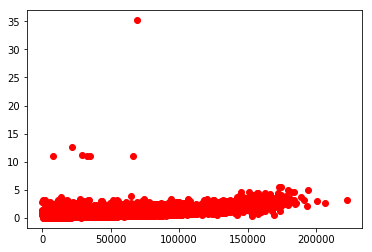

In [16]:
#Scatter of just galaxies from the first dataset
plt.plot(galaxy[0]["velocity"], galaxy[0]["distance"], "ro")
plt.show()

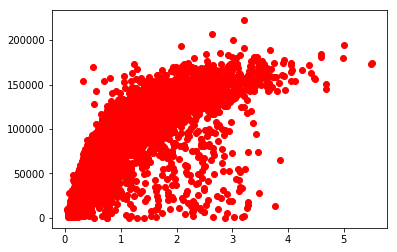

In [100]:
#Removing outliers and replotting
galaxy_outlierkiller = galaxy[0][galaxy[0]["distance"]<10]
#Scatter of just galaxies from the first dataset
plt.plot(galaxy_outlierkiller["distance"], galaxy_outlierkiller["velocity"], "ro")
plt.show()

In [160]:
#It seems that the farther away an object is, the faster it is moving. Good sign. 
#However, it seems the relationship in our data isn't linear. 
#Velocity appears to be related to distance in a logarithmic fashion, or perhaps to the square root of distance.
model2 = sm.ols(formula = "galaxy_outlierkiller['velocity'] ~ galaxy_outlierkiller['distance']", data=galaxy_outlierkiller).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     galaxy_outlierkiller['velocity']   R-squared:                       0.616
Model:                                          OLS   Adj. R-squared:                  0.616
Method:                               Least Squares   F-statistic:                 1.820e+04
Date:                              Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                                      14:27:46   Log-Likelihood:            -1.3232e+05
No. Observations:                             11365   AIC:                         2.646e+05
Df Residuals:                                 11363   BIC:                         2.647e+05
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.459e+04    446.898     77.401      0.000    3.37e+04    3.55e+04
galaxy_outlierkiller['distance']  4.588e+04    340.036    134.914      0.000    4.52e+04    4.65e+04
==============================================================================
Omnibus:                    10192.174   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1466889.692
Skew:                          -3.765   Prob(JB):                         0.00
Kurtosis:                      58.145   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

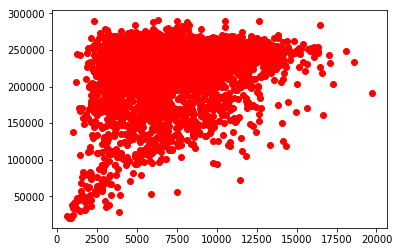

In [101]:
#Scatter of just quasars from the first dataset
plt.plot(qso[0]["distance"], qso[0]["velocity"], "ro")
plt.show()

In [93]:
model3 = sm.ols(formula = "galaxy[4]['velocity'] ~ galaxy[4]['distance']", data=galaxy[4]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     galaxy[4]['velocity']   R-squared:                       0.510
Model:                               OLS   Adj. R-squared:                  0.510
Method:                    Least Squares   F-statistic:                 1.182e+04
Date:                   Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                           12:13:35   Log-Likelihood:            -1.3372e+05
No. Observations:                  11367   AIC:                         2.675e+05
Df Residuals:                      11365   BIC:                         2.675e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.271e+04    477.280     89.489      0.000    4.18e+04    4.36e+04
galaxy[4]['distance']  3.815e+04    350.912    108.723      0.000    3.75e+04    3.88e+04
==============================================================================
Omnibus:                    17241.205   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43800193.360
Skew:                          -8.738   Prob(JB):                         0.00
Kurtosis:                     306.600   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#Getting a flawed picture of the data just to see what we're dealing with. Nothing is weighted appropriately.

Galaxy_R_Squared = []
QSO_R_Squared = []
Total_R_Squared = []
i = 0
j = 0
k = 0
while (i < len(galaxy)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<10]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared.append(model4.rsquared)
        i += 1
    except:
        break
    
while (j < len(qso)):
    try:
        v = qso[j]['velocity']
        d = qso[j]['distance']
        data = qso[j]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        QSO_R_Squared.append(model5.rsquared)
        j += 1
    except:
        break
        
while (k < len(finaldata)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared.append(model5.rsquared)
        k += 1
    except:
        break
    
print("Galaxies: ",np.mean(Galaxy_R_Squared))
print(np.var(Galaxy_R_Squared))
print("Quasars: ",np.mean(QSO_R_Squared))
print(np.var(QSO_R_Squared))
print("Together: ",np.mean(Total_R_Squared))
print(np.var(Total_R_Squared))

Galaxies:  0.6750091340378688
2.254580598482964e-05
Quasars:  0.08660226211032782
2.6958211656178917e-05
Together:  0.508741712798362
5.6408754527609005e-05


In [116]:
#It seems like galaxies perform decently well, with an average R Squared value of .552 across all of the sets of data.
#Quasars seem horrible. Typical R Squared value of .087. Again, this is probably due to our luminosity assumptions.
#Let's see how the larger sets perform compared to the smaller ones.

Galaxy_R_Squared7k = []
QSO_R_Squared7k = []
Total_R_Squared7k = []
Galaxy_R_Squared14k = []
QSO_R_Squared14k = []
Total_R_Squared14k = []
Galaxy_R_Squared21k = []
QSO_R_Squared21k = []
Total_R_Squared21k = []
Galaxy_R_Squared28k = []
QSO_R_Squared28k = []
Total_R_Squared28k = []
i = 0
j = 0
k = 0

while (i < 5):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared14k.append(model4.rsquared)
    i += 1
        
while ((i > 4) and (i < 10)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared21k.append(model4.rsquared)
    i += 1
        
while ((i > 9) and (i < 15)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared28k.append(model4.rsquared)
    i += 1

while ((i > 14) and (i < 20)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared7k.append(model4.rsquared)
        i += 1
    except:
        break

In [117]:
#Quasars

while (j < 5):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared14k.append(model4.rsquared)
    j += 1

while ((j > 4) and (j < 10)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared21k.append(model4.rsquared)
    j += 1

while ((j > 9) and (j < 15)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared28k.append(model4.rsquared)
    j += 1
        
while ((j > 14) and (j < 20)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared7k.append(model4.rsquared)
    j += 1

In [118]:
#Together

while (k < 5):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared14k.append(model4.rsquared)
    k += 1

while ((k > 4) and (k < 10)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared21k.append(model4.rsquared)
    k += 1
  
while ((k > 9) and (k < 15)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared28k.append(model4.rsquared)
    k += 1
        
while ((k > 14) and (k < 20)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared7k.append(model4.rsquared)
        k += 1
    except:
        break

In [119]:
print("7k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared7k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared7k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared7k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared7k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared7k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared7k))
print("14k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared14k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared14k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared14k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared14k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared14k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared14k))
print("21k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared21k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared21k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared21k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared21k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared21k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared21k))
print("28k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared28k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared28k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared28k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared28k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared28k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared28k))

7k:
Mean Total R Squared: 0.5207068011600091
Variance between Total R Squared values: 7.395570986446985e-33
Mean Galaxy R Squared: 0.616102494011911
Variance between Galaxy R Squared values: 4.930380657631324e-33
Mean Quasar R Squared: 0.09405782832259202
Variance between Quasar R Squared values: 1.479114197289397e-32
14k:
Mean Total R Squared: 0.5095627568723511
Variance between Total R Squared values: 1.232595164407831e-32
Mean Galaxy R Squared: 0.6156572463296441
Variance between Galaxy R Squared values: 0.0
Mean Quasar R Squared: 0.08623628507128889
Variance between Quasar R Squared values: 3.944304526105059e-32
21k:
Mean Total R Squared: 0.5025144384774594
Variance between Total R Squared values: 7.077313997946082e-24
Mean Galaxy R Squared: 0.6120352494946829
Variance between Galaxy R Squared values: 2.267964556386739e-21
Mean Quasar R Squared: 0.07938443726495063
Variance between Quasar R Squared values: 4.733935803303826e-32
28k:
Mean Total R Squared: 0.5021828546836284
Variance

In [161]:
galaxy[1].sort_values("redshift")

,class,redshift,redshift_err,green_mag,green_err,green_ext,red_mag,red_err,red_ext,velocity,Flux,distance
2519,GALAXY,-0.000352,0.000039,19.39391,0.012059,0.208195,18.94507,0.010991,0.144029,-105.420760,7.513290e-16,0.750084
10181,GALAXY,-0.000279,0.000030,19.97965,0.017277,2.241760,18.96873,0.011098,1.550839,-83.518520,7.351333e-16,0.758301
801,GALAXY,-0.000265,0.000021,20.71068,0.053418,0.094121,20.13237,0.048248,0.065112,-79.510105,2.517156e-16,1.295895
2566,GALAXY,-0.000174,0.000103,21.43024,0.195185,0.118829,20.32640,0.104424,0.082205,-52.219400,2.105223e-16,1.417019
1862,GALAXY,0.000100,0.000021,18.79436,0.009489,0.213524,18.12476,0.007625,0.147714,29.857842,1.599389e-15,0.514100
10646,GALAXY,0.000101,0.000018,21.97105,0.076099,0.266529,21.85900,0.124778,0.184383,30.285603,5.131663e-17,2.870091
2379,GALAXY,0.000518,0.000048,20.62934,0.026647,0.131326,19.88166,0.019692,0.090850,155.387708,3.170985e-16,1.154590
1577,GALAXY,0.001445,0.000015,14.89722,0.006256,0.178649,14.38480,0.003525,0.123589,432.920643,5.011158e-14,0.091845
5026,GALAXY,0.001611,0.000013,21.78159,0.074967,0.043627,22.07951,0.128033,0.030181,482.641272,4.188458e-17,3.176857
1917,GALAXY,0.002365,0.000006,15.38897,0.004139,0.128518,15.21965,0.004606,0.088908,708.117824,2.322727e-14,0.134904


In [157]:
test = pd.read_csv("cleandata\\TEST.csv")

14246